# Apprentissage Automatique  
# Regroupement. Algorithme K-Means  

### Auteurs :  
* Tudor Berariu - 2016  
* George Muraru - 2020  

## 1. Objectif du laboratoire  

L’objectif du laboratoire est de comprendre et d’implémenter une méthode d’apprentissage non supervisé pour le regroupement (*clustering*) : **l’algorithme K-Means**.  

La structure du document est la suivante :  
* [Section 2](#scrollTo=lmsr8fvNKQ5m) présente le contexte théorique et formalise le problème à résoudre  
* [Section 3](#scrollTo=Aj8ThCuUKcEB) décrit l’algorithme K-Means  
* [Section 4](#scrollTo=j5zthcYxMllG) énumère certaines des limites de l’algorithme K-Means et propose quelques solutions simples pour les surmonter  
* [Section 5](#scrollTo=yWjTUpn9OVY9) décrit quelques méthodes avancées pour le choix des centroïdes  
* [Section 6](#scrollTo=yWjTUpn9OVY9) présente la méthode d’évaluation de la performance de l’algorithme  
* [Section 7](#scrollTo=dDFqbGHmDqtt) contient une configuration initiale à exécuter sur Colab (ou localement) pour installer les dépendances  
* [Section 8](#scrollTo=2xk677iNQRvQ) contient les exercices à réaliser dans le cadre du laboratoire  
* [Section 9](#scrollTo=muZzrV7uVxXv) propose une description de l’ensemble de données utilisé  



## 2. Problème  

L’un des problèmes fondamentaux de l’apprentissage automatique est l’identification de groupes (en anglais, *clusters*) dans un ensemble d’objets, de sorte que les objets appartenant au même groupe présentent un degré élevé de similarité. Ce problème d’apprentissage non supervisé est appelé **analyse de regroupement** (*cluster analysis*).  

Le problème du regroupement peut être formalisé de différentes manières, et plusieurs approches existent.  
Dans ce laboratoire, nous allons résoudre le problème du regroupement basé sur les **centroïdes** (*centroid-based clustering*).  

On considère un ensemble de données $X = \{x_{1} , . . . x_{N}\}$ contenant \( N \) exemples dans un espace de D-dimension.  
L’objectif est de partitionner cet ensemble de données en K groupes représentés par K vecteurs prototypes (en anglais prototype vectors) $c_{k}$ (où $k \in \{1,.,K\}$), appelés centres ou **centroïdes**, de manière à minimiser la distance totale entre chaque exemple et le centroïde le plus proche :  



$$
\begin{equation}
J = \sum_{i=1}^{N}\sum_{k=1}^{K}in_{i,k} \cdot \left\Vert{x_{i} - c_{k}}\right\Vert^2 \tag{1}
\end{equation}
$$

$$
\begin{equation}
in_{i,k} = 
    \begin{cases}
    1, si\ k = arg\ min\left\Vert{x_{i} - c_{l}}\right\Vert\\
    0, sinon
    \end{cases} \tag{2}
\end{equation}
$$


---

## 3. L'Algorithme K-Means

<img src="./k-means.gif" style="margin-left: 50;" align="right" width="350" height="350"/>


L'algorithme des  K-Means [[1]](#M67) démarre avec un ensemble de K centroïdes choisis aléatoirement dans l'ensemble d'objets. Les deux étapes suivantes sont répétées alternativement jusqu'à ce que l'algorithme converge :

1. Tous les objets de l'ensemble de données sont parcourus et chacun est attribué au groupe correspondant au centroïde le plus proche.
2. Le centroïde de chaque groupe est recalculé.

L'algorithme converge lorsqu'après une itération, la composition des groupes n'a pas changé.

Pour comprendre pourquoi l'algorithme des K-moyennes trouve un minimum de l'expression J (Formule 1), il faut noter que les deux étapes optimisent successivement les paramètres $in_{i,k}$ et $c_{k}$.

1. En fixant $c_{k}$, $in_{i,k}$ est recalculé selon l'équation 2.
2. En fixant $in_{i,k}$, un minimum de l'expression $J$ est trouvé au point où la dérivée est nulle :

$$
\begin{equation}
\sum_{i=1}^{N}in_{i,k}(x_{i} - c_{k}) = 0
\end{equation}
$$

**Algorithme K-Means**

**Entrée :**

* $X = \{x_1, x_2, ..., x_N\}$ : L'ensemble de données avec $N$ points.
* $K$ : Le nombre de clusters souhaité.

**Sortie :**

* $C = \{c_1, c_2, ..., c_K\}$ : L'ensemble des centroïdes des clusters.
* $in_{i,k}$ : L'indicateur qui montre si le point $x_i$ appartient au cluster $k$.

**Algorithme :**

1. **Fonction**  K-Means($X$, $K$) :
2. Pour $k = 1$ jusqu'à $K$ exécuter :
    * $c_k \leftarrow$ rand($X$) (Les centroïdes initiaux sont choisis aléatoirement dans l'ensemble de données)
3. Répéter :
    * Pour $i = 1$ jusqu'à $N$ exécuter :
        * $in_{i,k} \leftarrow \begin{cases} 1, & \text{si } k = \arg\min_l ||x_i - c_l||^2 \\ 0, & \text{sinon} \end{cases}$ (L'exemple est associé au groupe le plus proche)
    * Pour $k = 1$ jusqu'à $K$ exécuter :
        * $c_k \leftarrow \frac{\sum_{i=1}^N in_{i,k} x_i}{\sum_{i=1}^N in_{i,k}}$ ($c_k$ devient la moyenne de tous les exemples du groupe $k$)
4. Jusqu'à ce que l'algorithme converge.


## 4. Limites de l'algorithme K-Means

L'algorithme K-Means présente les limitations importantes suivantes:

1.  **Le nombre de groupes K doit être connu a priori.**
    * Si ce nombre n'est pas connu, on peut exécuter l'algorithme pour différentes valeurs de K et choisir une partition appropriée. Sinon, on peut choisir une autre méthode de regroupement.
2.  **L'algorithme converge vers un minimum local.**
    * Il n'existe pas de méthode tractable qui garantisse un minimum global. En pratique, il est courant d'exécuter l'algorithme plusieurs fois et de conserver le meilleur résultat.
3.  **Le résultat de l'algorithme dépend du choix des centroïdes initiaux.**
    * Il existe plusieurs stratégies pour le choix des centroïdes initiaux ($c_{k}, 1 \le k \le K$), dont deux sont décrites dans [Section 5](#scrollTo=YB_3ayRlOOPP).

## 5. Choix des centroïdes initiaux

Dans l'algorithme classique K-Means, les K centroïdes initiaux sont choisis aléatoirement dans l'ensemble des objets du jeu de données. Les deux meilleures méthodes pour cette étape sont décrites ci-dessous.

### 5.1 Algorithme K-Means++

L'algorithme K-Means++ [[2]](#AV07) est une variante améliorée de l'algorithme K-Means dans laquelle les centroïdes initiaux sont choisis comme suit:

* Le premier centroïde $c_{1}$ est choisi aléatoirement dans le jeu de données.
* Les $K − 1$ suivants sont choisis successivement parmi les objets du jeu de données avec une probabilité:

$$
\begin{equation}
p_i = \frac{D(x_{i})^2}{\sum_{x\in{X}}D(x)^2}
\end{equation}
$$

pour chaque objet $x_{i}\in{X}$, où $D(x)$ est la plus petite distance entre l'objet $x$ et un centroïde déjà choisi.

### 5.2 Méthode Kaufman

Dans [[3]](#AV07), plusieurs méthodes d'initialisation des centroïdes pour l'algorithme K-Means ont été testées sur différents jeux de données. Les résultats ont montré que l'une des meilleures méthodes est celle proposée par Kaufman. On choisit d'abord l'objet le plus central du jeu de données, puis on ajoute successivement les objets qui rassemblent autour d'eux le plus grand nombre d'éléments.



Algorithme de Kaufman pour la sélection des centroïdes initiaux

1. **Fonction** KAUFMAN($X$, $K$) :
2. $c_1 \leftarrow$ l'exemple le plus central de $X$
3. Pour $k = 2$ jusqu'à $K$ exécuter :
    * Pour $x_i \in X$ exécuter :
        * Pour $x_j \in X \setminus \{x_i\}$ exécuter :
            * $d_j \leftarrow \min_{l=1...k-1} ||c_l - x_j||$
            * $c_{ij} \leftarrow \max(d_j - ||x_i - x_j||, 0)$
        * $g_i \leftarrow \sum_j c_{ij}$
    * $idx \leftarrow \arg\max_i g_i$
    * $c_k \leftarrow x_{idx}$  ▷ on choisit $x$ pour lequel $G$ est maximal


## 6. Évaluation d'un regroupement

Il n'existe pas de recette unique pour évaluer un regroupement réalisé pour un ensemble de données. En général, les métriques tiennent compte du fait que les exemples d'un groupe doivent être aussi proches/similaires que possible, et ceux de groupes différents doivent être aussi différents que possible.

Si les classes réelles sont connues (comme dans un problème d'apprentissage supervisé), alors l'évaluation peut être effectuée plus facilement. Parmi les méthodes existantes, *Rand Index* est décrit ci-dessous.

### 6.1 Rand Index

Étant donné un regroupement C et les valeurs réelles T des classes auxquelles appartiennent les objets d'un ensemble de données, nous définissons:

* *TP (vrais positifs)* le nombre de paires i, j qui sont dans le même groupe dans C et ont la même classe dans T;
* *FP (faux positifs)* le nombre de paires i, j qui sont dans le même groupe dans C, mais sont dans des classes différentes dans T;
* *FN (faux négatifs)* le nombre de paires i, j qui sont dans des groupes différents dans C, mais ont la même classe dans T;
* *TN (vrais négatifs)* le nombre de paires i, j qui sont dans des groupes différents dans C et ont des classes différentes dans T.

La métrique *Rand Index* est:

$
\begin{equation}
R = \frac{TP + TN}{TP + FP + FN + TN} \in [0, 1]
\end{equation}
$

## 7. Workspace Setup

### Dépendances


In [17]:
#!pip install matplotlib
#!pip install numpy

### Quelques bibliothèques dont nous aurons besoin

In [18]:
%matplotlib inline

import numpy as np
from zipfile import ZipFile
from random import randint

# Plotting stuff
import matplotlib.pyplot as plt
import matplotlib.markers
from mpl_toolkits.mplot3d import Axes3D

### Paramètres nécessaires à l'exécution


In [19]:
DATASET_NAME = 'Hepta'  #@param ['Atom', 'Chainlink', 'EngyTime', 'GolfBall', 'Hepta', 'Lsun', 'Target', 'TwoDiamonds', 'WingNut']
# Hepta is part of the Fundamental Clustering Problem Suit,  Size 212, Dimensions 3 (Hepta$Data), Classes 7 (Hepta$Cls)
# Numărul de clustere
K = 7  #@param {type: "slider", min: 2, max: 10}

### Fonctions auxiliaires pour le téléchargement et la manipulation de l'ensemble de données

In [20]:
def getArchive():
    """ Checks if FCPS.zip is present in the local directory, if not,
    downloads it.

    Returns:
        A ZipFile object for the FCPS archive
    """

    archive_url = ("https://github.com/cs-pub-ro/ML/raw/master/lab/lab1/FCPS.zip")
    local_archive = "FCPS.zip"
 
    from os import path
    if not path.isfile(local_archive):
        import urllib
        print("Downloading...")
        urllib.request.urlretrieve(archive_url, filename=local_archive)
        assert(path.isfile(local_archive))
        print("Got the archive")

    return ZipFile(local_archive)


def getDataSet(archive, dataSetName):
    """ Get a dataset from the FCPS.zip

    Args:
        archive (ZipFile): Object for the FCPS
        dataSetName (String): The dataset name from the FCPS

    Returns:
        A tuple (Xs, labels)
        Xs (numpy array): rows are the elements and the cols are the features
        labels (numpy array): labels associated with Xs

    """
    encoding = "ISO-8859-1"
    path = "FCPS/01FCPSdata/" + dataSetName
 
    lrnFile = path + ".lrn"
    with archive.open(lrnFile, "r") as f:
        N = int(f.readline().decode(encoding).split()[1])
        D = int(f.readline().decode(encoding).split()[1])
        f.readline()
        f.readline()
        Xs = np.zeros([N, D-1])
        for i in range(N):
            data = f.readline().decode(encoding).strip().split("\t")
            assert (len(data) == D)
            assert (int(data[0]) == (i + 1))
            Xs[i] = np.array(list(map(float, data[1:])))

    clsFile = path + ".cls"
    with archive.open(clsFile, "r") as f:
        labels = np.zeros(N).astype("uint")
 
        line = f.readline().decode(encoding)
        while line.startswith("%") or line.startswith("#"):
            line = f.readline().decode(encoding)
 
        i = 0
        while line and i < N:
            data = line.strip().split("\t")
            assert (len(data) == 2)
            assert (int(data[0]) == (i + 1))
            labels[i] = int(data[1])
            line = f.readline().decode(encoding)
            i = i + 1
 
        assert (i == N)
 
    return Xs, labels


def plotClusters(Xs, labels, centroids, clusters):
    """ Plot the data with the true labels alongside the centroids and the
    predicted cluster.
    If the elements from the dataset are not 2 or 3 dimensional then print
    the index, predicted cluster and true label.

    Args:
        Xs (numpy array): dataset
        labels (numpy array): real/true labels
        centroids (numpy array): positions for the centroids
        clusters (numpy array): predicted labels
    """

    labelsNo = np.max(labels)
    K = centroids.shape[0]

    markers = []

    while len(markers) < labelsNo:
        markers.extend(list(matplotlib.markers.MarkerStyle.filled_markers))

    colors = plt.cm.rainbow(np.linspace(0, 1, K+1))
    if Xs.shape[1] == 2:
        x = Xs[:,0]
        y = Xs[:,1]
        for (_x, _y, _c, _l) in zip(x, y, clusters, labels):
            plt.scatter(_x, _y, s=500, c=[colors[_c]], marker=markers[_l])
        plt.scatter(centroids[:,0], centroids[:, 1],
                    s=800, c=[colors[K]], marker=markers[labelsNo])
        plt.show()
    elif Xs.shape[1] == 3:
        x = Xs[:,0]
        y = Xs[:,1]
        z = Xs[:,2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for (_x, _y, _z, _c, _l) in zip(x, y, z, clusters, labels):
            ax.scatter(_x, _y, _z, s=200, c=[colors[_c]], marker=markers[_l])
        ax.scatter(centroids[:,0], centroids[:, 1], centroids[:, 2],
                    s=400, c=[colors[K]], marker=markers[labelsNo])
        plt.show()
    else:
        for i in range(Xs.shape[0]):
            print(f"{i} : {clusters[i]} ~ {labels[i]}")

### Chargement de l'ensemble de données

In [21]:
Xs, labels = getDataSet(getArchive(), DATASET_NAME)

## 8. Exigences

1. Implémentez l'algorithme K-Means décrit dans la [Section 3](#scrollTo=Aj8ThCuUKcEB)

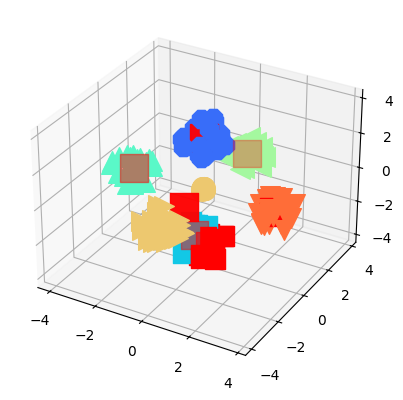

In [22]:
import math
import random

def kMeans(K, Xs):
    (N, D) = Xs.shape
 
    centroids = np.zeros((K, D))
    clusters = np.zeros(N).astype("uint")
    new_clusters = np.zeros(N).astype("uint")
    
    for k in range(K):
        imp_values = []
        rand_number = None
        while rand_number is None or rand_number in imp_values:
            rand_number = random.randint(0, N)
        centroids[k] = Xs[rand_number]
        imp_values.append(rand_number)
            
    
    def dist(a, b):
        ret = 0
        for i in range(len(a)):
            ret += (a[i] - b[i])**2
        return math.sqrt(ret)    
            
    
    def in_ik(c_list, x_list, i, k): 
        k_min = 0
        dist_min = math.inf
        for k2 in range(K):
            if dist(x_list[i], c_list[k2]) < dist_min:
                k_min = k2
                dist_min = dist(x_list[i], c_list[k2])
        if k_min == k:
            return 1
        return 0
    
    cond = True

    while cond == True:
        for i in range(N):
            idx = 0
            min_dist = +math.inf
            for k in range(K):
                if dist(Xs[i], centroids[k]) < min_dist: 
                    min_dist = dist(Xs[i], centroids[k])
                    idx = k
            new_clusters[i] = idx + 1
            
        if all(x == y for x, y in zip(clusters, new_clusters)):
            cond = False
        
        clusters = new_clusters
        
        for k in range(K):
            for d in range(D): # recalculare centroizi
                centroids[k][d] = sum([in_ik(centroids, Xs, i, k) * Xs[i][d] for i in range(N)]) / sum([in_ik(centroids, Xs, i, k) for i in range(N)])
            
    
    
    return clusters, centroids


clusters, centroids = kMeans(K, Xs)
plotClusters(Xs, labels, centroids, clusters)

2. Implémentez la métrique Rand Index décrite dans la [Section 6.1]



In [23]:
def randIndex(clusters, labels):
    right = 0
    total = 0
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if (clusters[i] == clusters[j]) == (labels[i] == labels[j]):
                right += 1
            total += 1
            
    return right / total

print("randIndex:", randIndex(clusters, labels))

randIndex: 0.947312210751157


3. Testez l'algorithme implémenté et son efficacité sur les ensembles de données de l'archive. Vous pouvez sélectionner un autre ensemble de données en utilisant DATASET dans les  [Paramètres nécessaires à l'exécution.](#scrollTo=kVQscCaxXfvF).
    
    **Expliquez pourquoi** sur certains ensembles de données les résultats sont *insatisfaisants*.


4. Implémentez l'un des deux algorithmes présentés dans la Section 5:
* méthode Kaufman pour la sélection des centroïdes initiaux
* algorithme K-Means++

Comparez les regroupements ainsi obtenus avec ceux obtenus avec l'algorithme K-Means.

L'initialisation attentive des centroïdes est-elle utile?

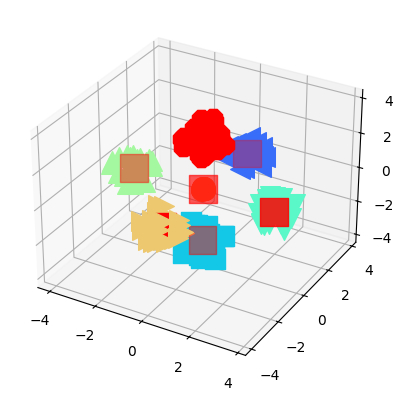

In [24]:
import math
import random
'''
for i in range(2, 9):
    K = i
    clusters, centroids = kMeans(K, Xs)    
    print("randIndex:", randIndex(clusters, labels))'''

def kMeans_plus(K, Xs):
    (N, D) = Xs.shape
 
    centroids = np.zeros((K, D))
    clusters = np.zeros(N).astype("uint")
    new_clusters = np.zeros(N).astype("uint")
                
    
    def dist(a, b):
        ret = 0
        for i in range(len(a)):
            ret += (a[i] - b[i])**2
        return math.sqrt(ret)
    
    def dist_centroid(point):
        min_dist = math.inf
        for cent in centroids:
            if not all(cent[d] == 0 for d in range(D)):
                if dist(point, cent) < min_dist:
                    min_dist = dist(point, cent)
        return min_dist
    
        
    
    centroids[0] = Xs[random.randint(0, N)]
            
    for k in range(1, K):
        random_number = np.random.rand()
        counter = 0
        for i in range(N):
            counter += dist_centroid(Xs[i])**2 / sum(dist_centroid(Xs[j])**2 for j in range(K))
            if counter > random_number:
                centroids[k] = Xs[i]
                break
        
            
    
    def in_ik(c_list, x_list, i, k): # erreur ici
        k_min = 0
        dist_min = math.inf
        for k2 in range(K):
            if dist(x_list[i], c_list[k2]) < dist_min:
                k_min = k2
                dist_min = dist(x_list[i], c_list[k2])
        if k_min == k:
            return 1
        return 0
    
    cond = True

    while cond == True:
        for i in range(N):
            idx = 0
            min_dist = +math.inf
            for k in range(K):
                if dist(Xs[i], centroids[k]) < min_dist: 
                    min_dist = dist(Xs[i], centroids[k])
                    idx = k
            new_clusters[i] = idx+1
            
        if all(x == y for x, y in zip(clusters, new_clusters)):
            cond = False
        
        clusters = new_clusters
        
        for k in range(K):
            for d in range(D):
                centroids[k][d] = sum([in_ik(centroids, Xs, i, k) * Xs[i][d] for i in range(N)]) / sum([in_ik(centroids, Xs, i, k) for i in range(N)])
            
    
    
    return clusters, centroids


clusters, centroids = kMeans_plus(K, Xs)
plotClusters(Xs, labels, centroids, clusters)

## 9. Ensemble de Données

Dans ce laboratoire, vous utiliserez les ensembles de données [FCPS](https://github.com/cs-pub-ro/ML/raw/master/lab/lab1/FCPS.zip) (Fundamental Clustering Problem Suite) de l'Université Philipps de Marburg.

Pour chaque ensemble de données, vous trouverez les fichiers suivants dans le sous-répertoire 01FCPSdata:

* $<$nom$>$.lrn - l'ensemble de données avec un identifiant pour chaque objet,
* $<$nom$>$.cls - les classes réelles des objets.

Les colonnes sont séparées par des tabulations.

# Bibliographie
<a name="M67">[1] *James MacQueen et al. Some methods for classification and analysis of multivariate observations. In Proceedings of the fifth Berkeley symposium on mathematical statistics and probability, volume 1, pages 281–297. California, USA, 1967*</a>

<a name="AV07">[2] *David Arthur and Sergei Vassilvitskii. k-means++: The advantages of careful seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027–1035. Society for Industrial and Applied Mathematics, 2007*</a>

<a name="PLL99">[3] *José Manuel Pena, Jose Antonio Lozano, and Pedro Larranaga. An empirical comparison of four initialization methods for the K-Means algorithm. Pattern recognition letters, 20(10):1027–1040, 1999*</a>
